## TP Depth and Depth Based Classification

Author: Pavlo Mozharovskyi

### Imports

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import neighbors
from tp_depth_classif_routines import *
from sklearn.model_selection import train_test_split

### Settings

In [2]:
# Plot
plt.close('all')
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 8)}
plt.rcParams.update(params)
# Seed initialization
np.random.seed(seed=123)
# For saving files
saving_activated = True # False

### 1. Plot some examples from the multivariate normal distribution

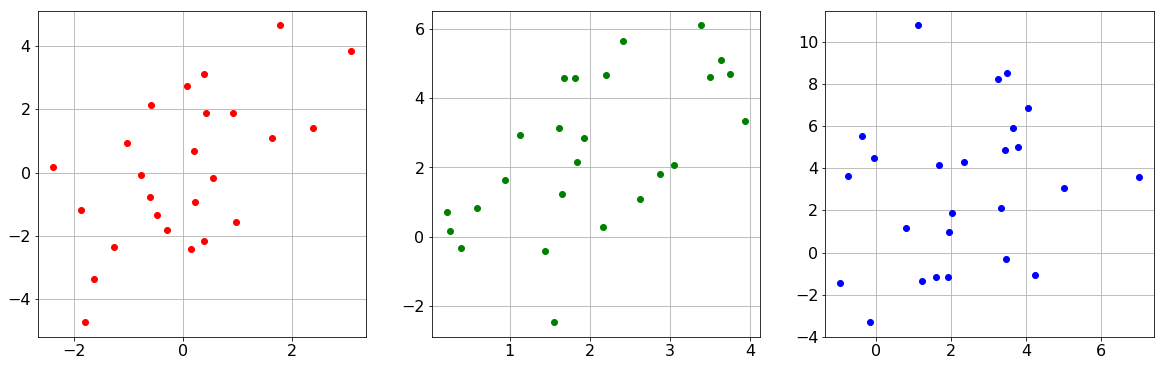

In [3]:
# Generate the data
X1 = np.random.multivariate_normal(np.zeros(2), [[1, 1], [1, 4]], 25)
X2 = np.random.multivariate_normal(np.ones(2) * 2, [[1, 1], [1, 4]], 25)
X3 = np.random.multivariate_normal(np.ones(2) * 2, [[4, 4], [4, 16]], 25)
# Plot the data
plt.close("all")
plt.figure(1, figsize=(20, 6))
plt.subplot(131)
plt.plot(X1.T[0], X1.T[1], 'ro')
plt.grid()
plt.subplot(132)
plt.plot(X2.T[0], X2.T[1], 'go')
plt.grid()
plt.subplot(133)
plt.plot(X3.T[0], X3.T[1], 'bo')
plt.grid()
plt.show()

### 2. Program and test Mahalanobis depth

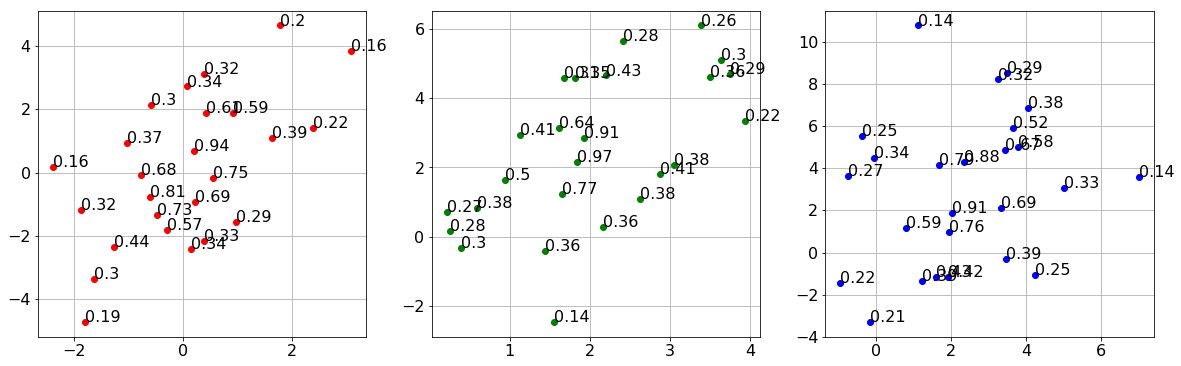

In [4]:
# Calculate Mahalanobis depth
X1_depthMah = depthMah(X1, X1)
X2_depthMah = depthMah(X2, X2)
X3_depthMah = depthMah(X3, X3)
# Plot the points indicating the depth values
plt.close("all")
plt.figure(1, figsize=(20, 6))
plt.subplot(131)
plt.plot(X1.T[0], X1.T[1], 'ro')
plt.grid()
for i in range(len(X1)):
    plt.text(X1[i][0], X1[i][1], str(round(X1_depthMah[i], 2)))
plt.subplot(132)
plt.plot(X2.T[0], X2.T[1], 'go')
plt.grid()
for i in range(len(X1)):
    plt.text(X2[i][0], X2[i][1], str(round(X2_depthMah[i], 2)))
plt.subplot(133)
plt.plot(X3.T[0], X3.T[1], 'bo')
plt.grid()
for i in range(len(X1)):
    plt.text(X3[i][0], X3[i][1], str(round(X3_depthMah[i], 2)))
plt.show()

### 3. Program and test the random Tukey depth

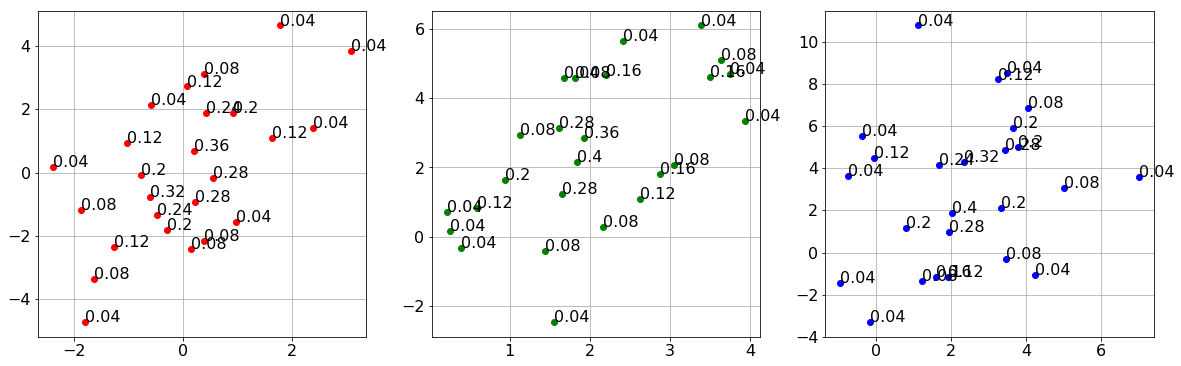

In [5]:
# Calculate the random Tukey depth
X1_depthTuk = depthTuk(X1, X1)
X2_depthTuk = depthTuk(X2, X2)
X3_depthTuk = depthTuk(X3, X3)
# Plot the points indicating the depth values
plt.close("all")
plt.figure(1, figsize=(20, 6))
plt.subplot(131)
plt.plot(X1.T[0], X1.T[1], 'ro')
plt.grid()
for i in range(len(X1)):
    plt.text(X1[i][0], X1[i][1], str(round(X1_depthTuk[i], 2)))
plt.subplot(132)
plt.plot(X2.T[0], X2.T[1], 'go')
plt.grid()
for i in range(len(X1)):
    plt.text(X2[i][0], X2[i][1], str(round(X2_depthTuk[i], 2)))
plt.subplot(133)
plt.plot(X3.T[0], X3.T[1], 'bo')
plt.grid()
for i in range(len(X1)):
    plt.text(X3[i][0], X3[i][1], str(round(X3_depthTuk[i], 2)))
plt.show()

### 4. Program the maximum depth classifier and test it (on location alternative)

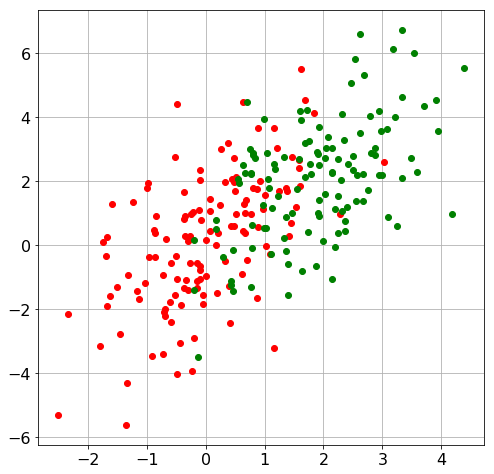

The error rate of the maximum depth classifier (Mahalanobis) = 0.12


In [6]:
# Generate the data set
X = np.concatenate((np.random.multivariate_normal(np.zeros(2), [[1, 1], [1, 4]], 250),
                    np.random.multivariate_normal(np.ones(2) * 2, [[1, 1], [1, 4]], 250)))
y = np.concatenate((np.zeros(250), np.ones(250)))
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Plot the train set
plt.close("all")
plt.plot(X_train[y_train == 0,0], X_train[y_train == 0,1], 'ro')
plt.plot(X_train[y_train == 1,0], X_train[y_train == 1,1], 'go')
plt.grid()
plt.show()
# Train the maximum depth classifier
MaxDepthClassif = MaxDepthClassifier(depthName="Mahalanobis")
MaxDepthClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_new = MaxDepthClassif.predict(X_test)
print("The error rate of the maximum depth classifier (Mahalanobis) = {:.2}".format(np.mean(y_new != y_test)))

### 5. Discovering the DD-plot

#### 5.a DD-plot for location alternative

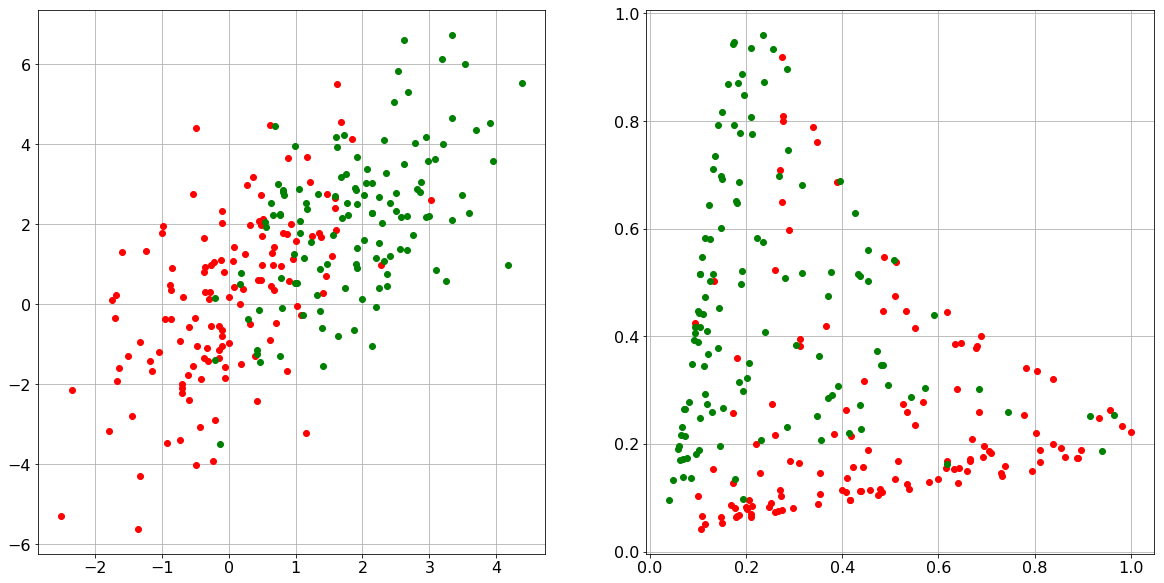

In [7]:
# Plot the train set
plt.close("all")
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(X_train[y_train == 0,0], X_train[y_train == 0,1], 'ro')
plt.plot(X_train[y_train == 1,0], X_train[y_train == 1,1], 'go')
plt.grid()
# Calculate depths
X_train0_depthMah = depthMah(X_train, X_train[y_train == 0,:])
X_train1_depthMah = depthMah(X_train, X_train[y_train == 1,:])
X_ddMah = np.stack((X_train0_depthMah, X_train1_depthMah), axis=1)
# Plot the DD-plot
plt.subplot(122)
plt.plot(X_ddMah[y_train == 0,0], X_ddMah[y_train == 0,1], 'ro')
plt.plot(X_ddMah[y_train == 1,0], X_ddMah[y_train == 1,1], 'go')
plt.grid()
plt.show()

#### 5.b DD-plot for location-scale alternative

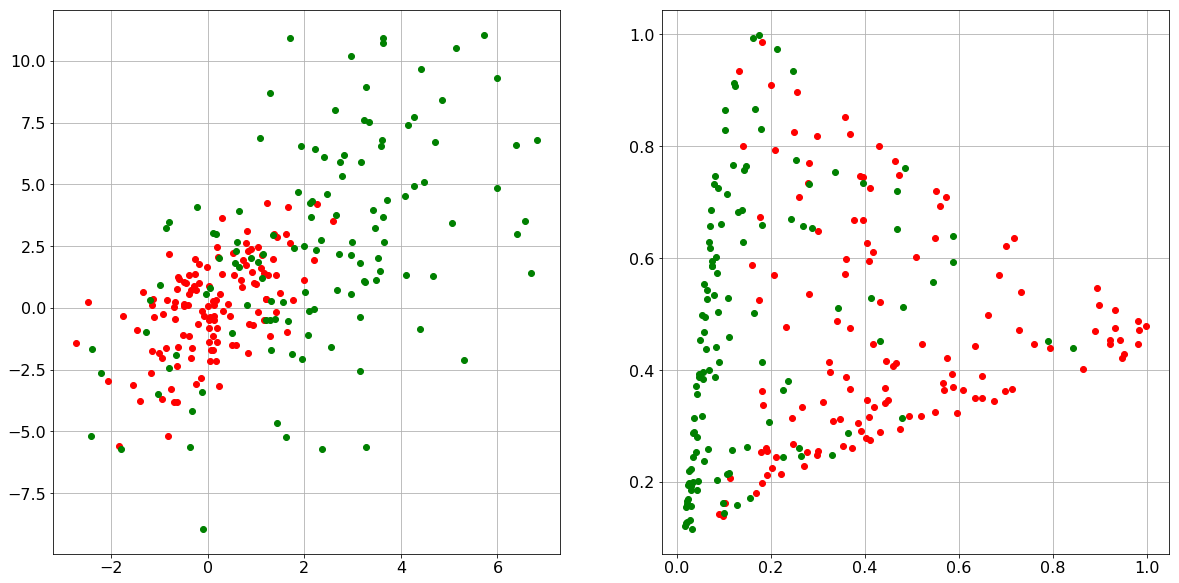

In [8]:
# Generate the data set
X = np.concatenate((np.random.multivariate_normal(np.zeros(2), [[1, 1], [1, 4]], 250),
                    np.random.multivariate_normal(np.ones(2) * 2, [[4, 4], [4, 16]], 250)))
y = np.concatenate((np.zeros(250), np.ones(250)))
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Plot the train set
plt.close("all")
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(X_train[y_train == 0,0], X_train[y_train == 0,1], 'ro')
plt.plot(X_train[y_train == 1,0], X_train[y_train == 1,1], 'go')
plt.grid()
# Calculate depths
X_train0_depthMah = depthMah(X_train, X_train[y_train == 0,:])
X_train1_depthMah = depthMah(X_train, X_train[y_train == 1,:])
X_ddMah = np.stack((X_train0_depthMah, X_train1_depthMah), axis=1)
# Plot the DD-plot
plt.subplot(122)
plt.plot(X_ddMah[y_train == 0,0], X_ddMah[y_train == 0,1], 'ro')
plt.plot(X_ddMah[y_train == 1,0], X_ddMah[y_train == 1,1], 'go')
plt.grid()
plt.show()

### 6. Program and test the DD-plot classifier (on the location-scale alternative)

In [9]:
# Train the DD-plot classifier
DDClassif = DDkNNClassifier(depthName="Mahalanobis")
DDClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_new = DDClassif.predict(X_test)
print("The error rate of the DD-plot classifier (Mahalanobis) = {:.2}".format(np.mean(y_new != y_test)))

The error rate of the DD-plot classifier (Mahalanobis) = 0.19


### 7. Test the maximum depth classifier on the location-scale alternative

In [10]:
# Train the maximum depth classifier
MaxDepthClassif = MaxDepthClassifier(depthName="Mahalanobis")
MaxDepthClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_new = MaxDepthClassif.predict(X_test)
print("The error rate of the maximum depht classifier (Mahalanobis) = {:.2}".format(np.mean(y_new != y_test)))

The error rate of the maximum depht classifier (Mahalanobis) = 0.26


### 8. Program the Cauchy distribution and plot a sample from it

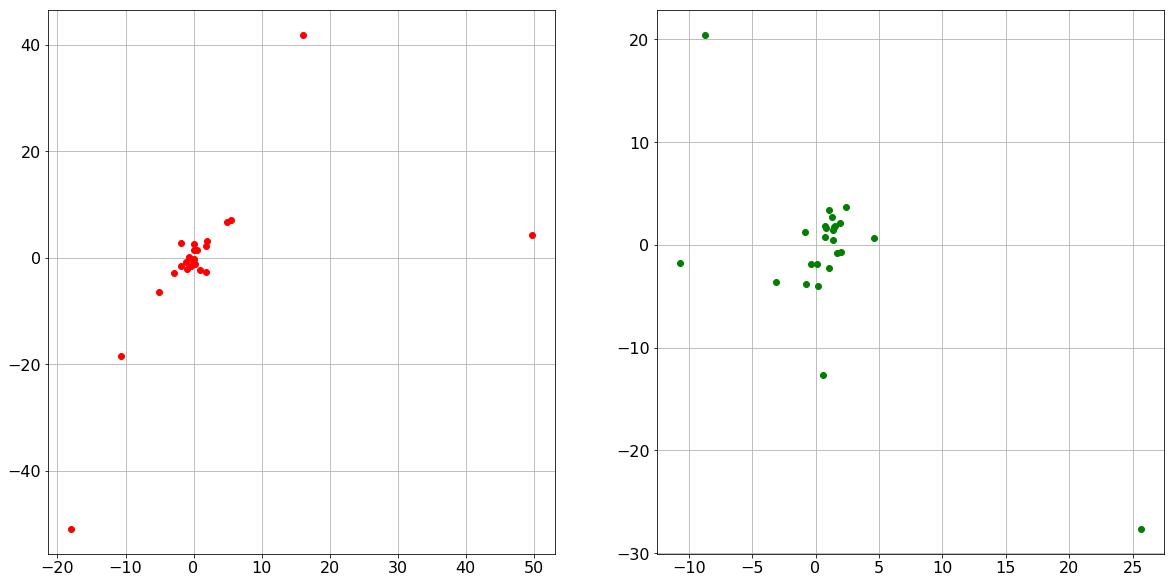

In [11]:
# Generate the data
X4 = rmvt(np.zeros(2), [[1, 1], [1, 4]], 1, 25)
X5 = rmvt(np.ones(2), [[1, 1], [1, 4]], 1, 25)
# Plot the data
plt.close("all")
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(X4.T[0], X4.T[1], 'ro')
plt.grid()
plt.subplot(122)
plt.plot(X5.T[0], X5.T[1], 'go')
plt.grid()
plt.show()

### 9. Draw DD-plots for the Cauchy distribution

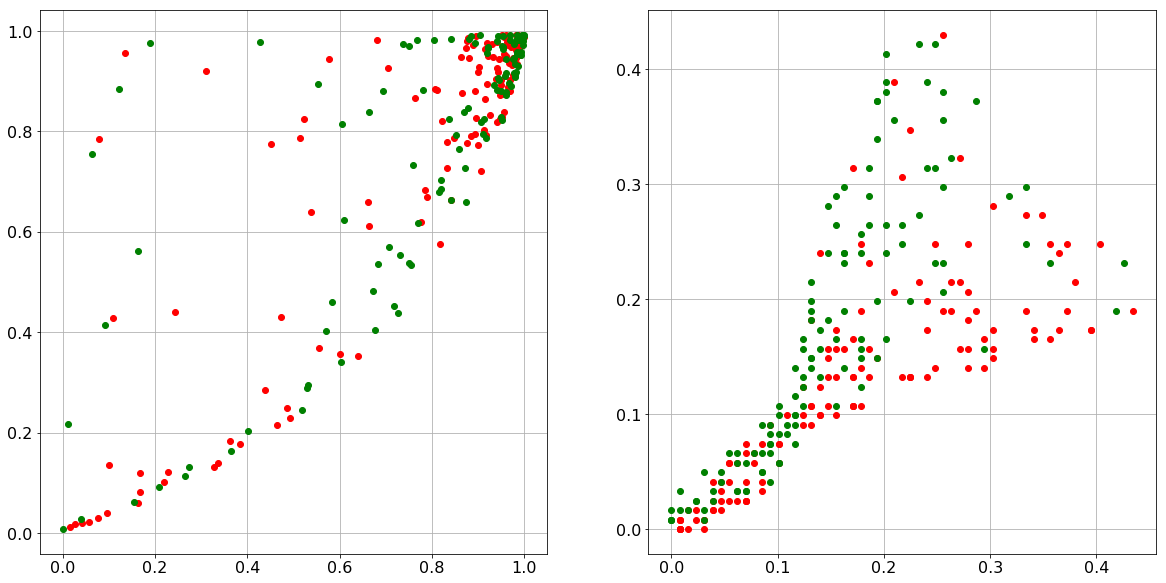

In [12]:
# Generate the data set
X = np.concatenate((rmvt(np.zeros(2), [[1, 1], [1, 4]], 1, 250),
                    rmvt(np.ones(2), [[1, 1], [1, 4]], 1, 250)))
y = np.concatenate((np.zeros(250), np.ones(250)))
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# Calculate Mahalanobis depths
X_train0_depthMah = depthMah(X_train, X_train[y_train == 0,:])
X_train1_depthMah = depthMah(X_train, X_train[y_train == 1,:])
X_ddMah = np.stack((X_train0_depthMah, X_train1_depthMah), axis=1)
# Plot the DD-plot
plt.close("all")
plt.figure(1, figsize=(20, 10))
plt.subplot(121)
plt.plot(X_ddMah[y_train == 0,0], X_ddMah[y_train == 0,1], 'ro')
plt.plot(X_ddMah[y_train == 1,0], X_ddMah[y_train == 1,1], 'go')
plt.grid()
# Calculate the random Tukey depths
X_train0_depthTuk = depthTuk(X_train, X_train[y_train == 0,:], ndirs=100)
X_train1_depthTuk = depthTuk(X_train, X_train[y_train == 1,:], ndirs=100)
X_ddTuk = np.stack((X_train0_depthTuk, X_train1_depthTuk), axis=1)
# Plot the DD-plot
plt.subplot(122)
plt.plot(X_ddTuk[y_train == 0,0], X_ddTuk[y_train == 0,1], 'ro')
plt.plot(X_ddTuk[y_train == 1,0], X_ddTuk[y_train == 1,1], 'go')
plt.grid()
plt.show()

### 10. Compare the two DD-plot classifiers

In [13]:
# Train the DD-plot classifier with Mahalanobis depth
DDClassif = DDkNNClassifier(depthName="Mahalanobis")
DDClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_newMah = DDClassif.predict(X_test)
print("The error rate of the DD-plot classifier (Mahalanobis) = {:.2}".format(np.mean(y_newMah != y_test)))
# Train the DD-plot classifier with the random Tukey depth
DDClassif = DDkNNClassifier(depthName="Tukey", ndirs=100)
DDClassif.fit(X_train, y_train)
# Report the error rate of the classifier
y_newTuk = DDClassif.predict(X_test)
print("The error rate of the DD-plot classifier (Tukey) = {:.2}".format(np.mean(y_newTuk != y_test)))

The error rate of the DD-plot classifier (Mahalanobis) = 0.43
The error rate of the DD-plot classifier (Tukey) = 0.36
